# Sugestões 

> **É possível predizer com determinado nível de confiança a idade em que o estudante fará a experimentação de bebidas alcoolicas ou o uso de drogas?**

# Projeto Módulo 3 
---

# Resumo

---

# Pontos Principais

---

# Pre processamento
---


## Importações Dados e  Bibliotecas

Fazer a limpeza dos dados antes e upar no github

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_style('darkgrid')
sns.set_context("talk")

## Informações sobre a base de dados

### PeNSE (Pesquisa Nacional de Saúde do Escolar)

A pesquisa PeNSE é uma pesquisa feita por amostragem que permite conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescente , é feita utilizando dados para a seleção de escolas publicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.

É fruto de uma parceria entre os Ministérios da Saúde e Educação. A pesquisa fornece informações sobre características básicas da população de estudo, incluindo aspectos socioecnômicos, como escolaridade dos pais, inserção no mercado de trabalho e posse de bens e serviços; fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas; saúde sexual e reprodutiva; exposição a acidentes e violências; hábitos de higiene; saúde bucal; saúde mental;... dentre vaŕias outras informações. 


In [2]:
pense_2015_microdados = pd.read_csv('https://raw.githubusercontent.com/ConradBitt/BootCamp_DataScience/master/Analise%20Dados%20Saude%20e%20Educa%C3%A7%C3%A3o/PeNSE_2015_AMOSTRA2_JA_SELECIONADA_PARA_ANALISE.csv')


#### Pre processamento do dados

In [3]:
selecao = {'REGEOGR':'Região geográfica','VB01001':'sexo','VB01002':'cor','VB01022':'turno', 
           'VB01008A':'escolaridade mae','VB04002':'idade quando experimentou cigarro',
           'VB04006A':'responsáveis fuma','VB05002':'usou bebida alcoolica',
           'VB05003':'idade quando tomou a primeira dose de bebida alcoólica',
           'VB07010':'sofreu bullying','VB12001':'frequência com que se sente só',
           'VB12003':'Quantos amigos próximos','VB13005':'como classifica o proprio estado de saúde',
           'VB11006':'considera sua imagem corporal como sendo algo',
           'VB11007':'como se sente em relação ao seu corpo','VB17003':'peso do aluno','VB17004':'altura do aluno','VB01003':'idade do aluno',
           'VB17006':'estado nutricional do estudante','V0006':'Situação da escola','V0007':'Dependência Administrativa da escola',
           'V0008':'Esfera Administrativa da escola'
          }

dados_selecionados = pense_2015_microdados[selecao.keys()]
dados_selecionados.columns = [i.replace(' ', '_').lower() for i in selecao.values()]

regeogr = {1:'Norte',
          2:'Nordeste',
          3:'Sudeste',
          4:'Sul',
          5:'Centro-Oeste'
         }

sexo = {1: 'Masculino',2: 'Feminino'}
cor = {1:'Branca',2:'Preta',3:'Amarela',4:'Parda',5:'Indígena',99:'Não informado'}
turno = {1: 'Manhã',2: 'Intermediário',3: 'Tarde',4: 'Noite',5: 'Integral',99: 'Não informado'}

escolaridade_mae = {
    1: 'Minha mãe não estudou',
    2: 'Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou',
    3: 'Minha mãe terminou o ensino fundamental ou 1º grau',
    4: 'Minha mãe começou o ensino médio ou 2º grau, mas não terminou',
    5: 'Minha mãe terminou o ensino médio ou 2° grau',
    6: 'Minha mãe começou a faculdade (ensino superior), mas não terminou',
    7: 'Minha mãe terminou a faculdade (ensino superior)',
    8: 'Não sei',
    99: 'Não informado'
}


idade_quando_experimentou_cigarro = {
    -1:'Pulo no questionário',7:'7 anos ou menos',8:'8 anos',9:'9 anos',10:'10 anos',
    11:'11 anos',12:'12 anos',13:'13 anos',14:'14 anos',15:'15 anos',16:'16 anos',
    17:'17 anos',18:'18 anos ou mais',99:'Não informado'
}

responsaveis_fuma = {
    -1: 'Pulo no questionário', 1: 'Nenhum deles',2: 'Só meu pai ou responsável do sexo masculino',
    3: 'Só minha mãe ou responsável do sexo feminino',4: 'Meu pai e minha mãe ou responsáveis',
    5:'Não sei',99:'Não informado'
}
usou_bebida_alcoolica = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}

idade_quando_tomou_primeira_dose_bebida_alcoólica = {
    -1:'Pulo no questionário',7:'7 anos ou menos',8:'8 anos',9:'9 anos',10:'10 anos',
    11:'11 anos',12:'12 anos',13:'13 anos',14:'14 anos',15:'15 anos',16:'16 anos',
    17:'17 anos',18:'18 anos ou mais',99:'Não informado'
}

sofreu_bullying = {
    1: 'Sim',
    2: 'Não',
    3: 'Não sei o que é bullying',
    99:'Não informado'
}

frequência_com_que_se_sente_isolado = {
    1:'Nunca',
    2:'Raramente',
    3: 'Às vezes',
    4: 'Na maioria das vezes',
    5:'Sempre',
    99:'Não informado'
}
quantos_amigos_proximos = {
    1:'Nenhum amigo (0)',
    2: '1 amigo',
    3: '2 amigos',
    4: '3 ou mais amigos',
    99:'Não informado'
}
como_classifica_o_proprio_estado_de_saude = {
    1:'Muito bom',
    2: 'Bom',
    3: 'Regular',
    4: 'Ruim',
    5: 'Muito ruim',
    99: 'Não informado'
}
considera_sua_imagem_corporal_como_sendo_algo = {
    1:'Muito importante',
    2:'Importante',
    3:'Pouco importante',
    4:'Sem importância',
    99: 'Não informado'
}
como_se_sente_em_relação_ao_seu_corpo = {
    1: 'Muito satisfeito(a)',
    2: 'Satisfeito(a)',
    3: 'Indiferente',
    4:'Insatisfeito(a)',
    5:'Muito insatisfeito(a)',
    99:'Não informado'
}
peso_do_aluno = {}
altura_do_aluno = {}
idade_do_aluno = {
    11:'11 anos ou menos',
    12:'12 anos',
    13:'13 anos',
    14:'14 anos',
    15:'15 anos',
    16:'16 anos', 
    17:'17 anos',
    18:'18 anos',
    19:'19 anos ou mais'
}
estado_nutricional_do_estudante = {
    1: 'Deficit de peso',
    2: 'Eutrofia',
    3: 'Sobrepeso',
    4: 'Obesidade'
}

situacao_da_escola = {1:'Urbana', 2: 'Rural'}

dependencia_Administrativa_da_escola = {1:'Pública', 2:'Privada'}

esfera_Administrativa_da_escola = {1: 'Municipal',
                                   2: 'Estadual',
                                   3: 'Federal',
                                   4: 'Privada'}

tabelas_de_variaveis = [regeogr,sexo, cor, turno,escolaridade_mae,
                        idade_quando_experimentou_cigarro,
                        responsaveis_fuma,
                        usou_bebida_alcoolica,
                        idade_quando_tomou_primeira_dose_bebida_alcoólica,
                        sofreu_bullying,
                        frequência_com_que_se_sente_isolado,
                        quantos_amigos_proximos,
                        como_classifica_o_proprio_estado_de_saude,
                        considera_sua_imagem_corporal_como_sendo_algo,
                        como_se_sente_em_relação_ao_seu_corpo,
                        peso_do_aluno, altura_do_aluno, idade_do_aluno,
                        estado_nutricional_do_estudante,
                        situacao_da_escola, dependencia_Administrativa_da_escola, 
                        esfera_Administrativa_da_escola]

dicionario_variaveis = {}
i = 0
for variavel in dados_selecionados.columns:
    dicionario_variaveis[str(variavel)] = tabelas_de_variaveis[i]
    i += 1

criando função para ajustar as tabelas:

> A função `cria_tabela_frequencia_percentuais`: Recebe uma `Series` para calcular o percentual e a frequência. Recebe os classificadores associados a cada frequência e o Rotudo da variável:

In [4]:
def cria_tabela_frequencia_percentuais(series : pd.Series , classificacoes : dict, rotulo : str ):
    percentual = series.value_counts(normalize=True) * 100
    frequencia = series.value_counts()
    
    tab1 = pd.DataFrame({'frequencia':frequencia,
                        'percentual':percentual})
    tab1.rename(index=classificacoes, inplace=True)
    tab1.rename_axis(index=rotulo, inplace=True)
    return tab1

## Classificadores dos Dados

In [5]:
classificadores_rotulos = {}

for rotulo, variavel in dicionario_variaveis.items():
    dataframe = pd.DataFrame(variavel.keys(),index=variavel.values(), columns=[str(rotulo)])
    classificadores_rotulos[rotulo] = dataframe
    display(dataframe)

,região_geográfica
Norte,1
Nordeste,2
Sudeste,3
Sul,4
Centro-Oeste,5


,sexo
Masculino,1
Feminino,2


,cor
Branca,1
Preta,2
Amarela,3
Parda,4
Indígena,5
Não informado,99


,turno
Manhã,1
Intermediário,2
Tarde,3
Noite,4
Integral,5
Não informado,99


,escolaridade_mae
Minha mãe não estudou,1
"Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou",2
Minha mãe terminou o ensino fundamental ou 1º grau,3
"Minha mãe começou o ensino médio ou 2º grau, mas não terminou",4
Minha mãe terminou o ensino médio ou 2° grau,5
"Minha mãe começou a faculdade (ensino superior), mas não terminou",6
Minha mãe terminou a faculdade (ensino superior),7
Não sei,8
Não informado,99


,idade_quando_experimentou_cigarro
Pulo no questionário,-1
7 anos ou menos,7
8 anos,8
9 anos,9
10 anos,10
11 anos,11
12 anos,12
13 anos,13
14 anos,14
15 anos,15


,responsáveis_fuma
Pulo no questionário,-1
Nenhum deles,1
Só meu pai ou responsável do sexo masculino,2
Só minha mãe ou responsável do sexo feminino,3
Meu pai e minha mãe ou responsáveis,4
Não sei,5
Não informado,99


,usou_bebida_alcoolica
Pulo no questionário,-1
Sim,1
Não,2
Não informado,99


,idade_quando_tomou_a_primeira_dose_de_bebida_alcoólica
Pulo no questionário,-1
7 anos ou menos,7
8 anos,8
9 anos,9
10 anos,10
11 anos,11
12 anos,12
13 anos,13
14 anos,14
15 anos,15


,sofreu_bullying
Sim,1
Não,2
Não sei o que é bullying,3
Não informado,99


,frequência_com_que_se_sente_só
Nunca,1
Raramente,2
Às vezes,3
Na maioria das vezes,4
Sempre,5
Não informado,99


,quantos_amigos_próximos
Nenhum amigo (0),1
1 amigo,2
2 amigos,3
3 ou mais amigos,4
Não informado,99


,como_classifica_o_proprio_estado_de_saúde
Muito bom,1
Bom,2
Regular,3
Ruim,4
Muito ruim,5
Não informado,99


,considera_sua_imagem_corporal_como_sendo_algo
Muito importante,1
Importante,2
Pouco importante,3
Sem importância,4
Não informado,99


,como_se_sente_em_relação_ao_seu_corpo
Muito satisfeito(a),1
Satisfeito(a),2
Indiferente,3
Insatisfeito(a),4
Muito insatisfeito(a),5
Não informado,99


,peso_do_aluno


,altura_do_aluno


,idade_do_aluno
11 anos ou menos,11
12 anos,12
13 anos,13
14 anos,14
15 anos,15
16 anos,16
17 anos,17
18 anos,18
19 anos ou mais,19


,estado_nutricional_do_estudante
Deficit de peso,1
Eutrofia,2
Sobrepeso,3
Obesidade,4


,situação_da_escola
Urbana,1
Rural,2


,dependência_administrativa_da_escola
Pública,1
Privada,2


,esfera_administrativa_da_escola
Municipal,1
Estadual,2
Federal,3
Privada,4


## Distribuições de frequências e proporções

In [6]:
dataframes_com_percentuais_frequencias_variaveis = {}
for rotulo, variavel in dicionario_variaveis.items():
    dataframe = cria_tabela_frequencia_percentuais(dados_selecionados[rotulo], variavel, str(rotulo))
    #display(dataframe['frequencia'].plot(kind='bar'));
    display(dataframe)
    dataframes_com_percentuais_frequencias_variaveis[rotulo] = dataframe

,frequencia,percentual
região_geográfica,,
Nordeste,3465,20.928968
Centro-Oeste,3420,20.657164
Sudeste,3276,19.787388
Sul,3207,19.370621
Norte,3188,19.255859


,frequencia,percentual
sexo,,
Masculino,8287,50.054361
Feminino,8269,49.945639


,frequencia,percentual
cor,,
Parda,6726,40.625755
Branca,6575,39.713699
Preta,1939,11.711766
Amarela,712,4.300556
Indígena,581,3.509302
Não informado,23,0.138922


,frequencia,percentual
turno,,
Manhã,9198,55.556898
Tarde,5362,32.387050
Noite,1258,7.598454
Integral,651,3.932109
Intermediário,83,0.501329
Não informado,4,0.024160


,frequencia,percentual
escolaridade_mae,,
Não sei,4168,25.175163
Minha mãe terminou a faculdade (ensino superior),3099,18.718289
Minha mãe terminou o ensino médio ou 2° grau,2840,17.153902
"Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou",2735,16.519691
"Minha mãe começou o ensino médio ou 2º grau, mas não terminou",1011,6.106547
Minha mãe terminou o ensino fundamental ou 1º grau,991,5.985745
"Minha mãe começou a faculdade (ensino superior), mas não terminou",929,5.611259
Minha mãe não estudou,749,4.524040
Não informado,34,0.205364


,frequencia,percentual
idade_quando_experimentou_cigarro,,
Pulo no questionário,13753,83.069582
14 anos,476,2.875091
13 anos,475,2.869050
15 anos,470,2.838850
12 anos,373,2.252960
16 anos,222,1.340904
10 anos,169,1.020778
11 anos,158,0.954337
7 anos ou menos,133,0.803334


,frequencia,percentual
responsáveis_fuma,,
Nenhum deles,8688,52.476444
Pulo no questionário,4706,28.424740
Só meu pai ou responsável do sexo masculino,1470,8.878956
Só minha mãe ou responsável do sexo feminino,925,5.587098
Meu pai e minha mãe ou responsáveis,469,2.832810
Não sei,268,1.618748
Não informado,30,0.181203


,frequencia,percentual
usou_bebida_alcoolica,,
Sim,7078,42.751872
Não,4747,28.672385
Pulo no questionário,4706,28.424740
Não informado,25,0.151003


,frequencia,percentual
idade_quando_tomou_a_primeira_dose_de_bebida_alcoólica,,
Pulo no questionário,4706,28.424740
1,4575,27.633486
14 anos,1512,9.132641
13 anos,1318,7.960860
15 anos,1276,7.707176
12 anos,987,5.961585
16 anos,508,3.068374
11 anos,369,2.228799
10 anos,365,2.204639


,frequencia,percentual
sofreu_bullying,,
Não,8533,51.540227
Sim,7584,45.808166
Não sei o que é bullying,387,2.337521
Não informado,52,0.314086


,frequencia,percentual
frequência_com_que_se_sente_só,,
Nunca,5805,35.062817
Às vezes,4580,27.663687
Raramente,3584,21.647741
Na maioria das vezes,1601,9.670210
Sempre,920,5.556898
Não informado,66,0.398647


,frequencia,percentual
quantos_amigos_próximos,,
3 ou mais amigos,12803,77.331481
2 amigos,2056,12.418459
1 amigo,988,5.967625
Nenhum amigo (0),642,3.877748
Não informado,67,0.404687


,frequencia,percentual
como_classifica_o_proprio_estado_de_saúde,,
Muito bom,6294,38.016429
Bom,5820,35.153419
Regular,3222,19.461223
Ruim,618,3.732786
Muito ruim,488,2.947572
Não informado,114,0.688572


,frequencia,percentual
considera_sua_imagem_corporal_como_sendo_algo,,
Muito importante,7102,42.896835
Importante,6604,39.888862
Pouco importante,1969,11.892969
Sem importância,726,4.385117
Não informado,155,0.936216


,frequencia,percentual
como_se_sente_em_relação_ao_seu_corpo,,
Satisfeito(a),6920,41.797536
Muito satisfeito(a),4608,27.832810
Insatisfeito(a),2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito(a),714,4.312636
Não informado,181,1.093259


,frequencia,percentual
peso_do_aluno,,
50.0,73,0.440928
53.5,67,0.404687
50.2,66,0.398647
52.5,65,0.392607
51.9,65,0.392607
...,...,...
133.1,1,0.006040
108.0,1,0.006040
93.6,1,0.006040


,frequencia,percentual
altura_do_aluno,,
160.0,197,1.189901
162.0,164,0.990577
157.0,155,0.936216
155.0,154,0.930176
161.0,153,0.924136
...,...,...
190.1,1,0.006040
124.1,1,0.006040
132.9,1,0.006040


,frequencia,percentual
idade_do_aluno,,
12 anos,2634,15.909640
13 anos,2561,15.468712
15 anos,2425,14.647258
16 anos,2270,13.711041
14 anos,2133,12.883547
11 anos ou menos,2072,12.515100
17 anos,1537,9.283643
18 anos,563,3.400580
19 anos ou mais,361,2.180478


,frequencia,percentual
estado_nutricional_do_estudante,,
Eutrofia,11479,69.334380
Sobrepeso,3028,18.289442
Obesidade,1514,9.144721
Deficit de peso,535,3.231457


,frequencia,percentual
situação_da_escola,,
Urbana,15705,94.85987
Rural,851,5.14013


,frequencia,percentual
dependência_administrativa_da_escola,,
Pública,12381,74.782556
Privada,4175,25.217444


,frequencia,percentual
esfera_administrativa_da_escola,,
Estadual,9009,54.415318
Privada,4175,25.217444
Federal,3072,18.555207
Municipal,300,1.812032


# Análise dos Dados
---

Grafico tem motivo

Uma tabela pode ser melhor que um gráfico 

Gera a hipótese, faz o código, analise do resultado.

Não testar vários modelos num mesmo modelo. Lucidez na escolha de modelo.

Ser claro com as hipóteses e objetivos.


## Primeira Análise: Presença do cigarro na vida do adolescente

Tendo em vista que temos 2786 registros de alunos que já informaram consumir cigarro, excluindo os alunos que não informaram ou não consumiram, vamos analisar as outras variáveis disponíveis destes alunos:


In [7]:
consumiu_cigarro = list(idade_quando_experimentou_cigarro.keys())[1:-1]
consumiu_cigarro = dados_selecionados.query(f'idade_quando_experimentou_cigarro == {consumiu_cigarro}')
consumiu_cigarro.shape

(2786, 22)

### Medidas de tendência central e a variância das idades

Analisar preliminarmente as medidas de tendência central, disperção e percentis das idades permite se antecipar como estão distribuidos os dados. 

In [8]:
consumiu_cigarro.groupby('sexo',)['idade_do_aluno'].describe().rename(index=sexo)

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
Masculino,1499.0,15.767845,1.663078,13.0,14.0,16.0,17.0,19.0
Feminino,1287.0,15.547786,1.618519,13.0,14.0,16.0,17.0,19.0


#### Análise Descritiva
> Podemos verificar que dos alunos que já consumiram cigarro, a maior parte das amostras são masculinas. São 1499 meninos e 1287 meninas. Outro ponto que já é possível notar que dos $50\%$ dos alunos que já fizeram o uso do cigarro pelo menos uma vez, independente do sexo da amostra, tem até 16 anos.

#### Gráfico 1: Dos alunos que consumiram cigarros, a idade de alunos e o sexo

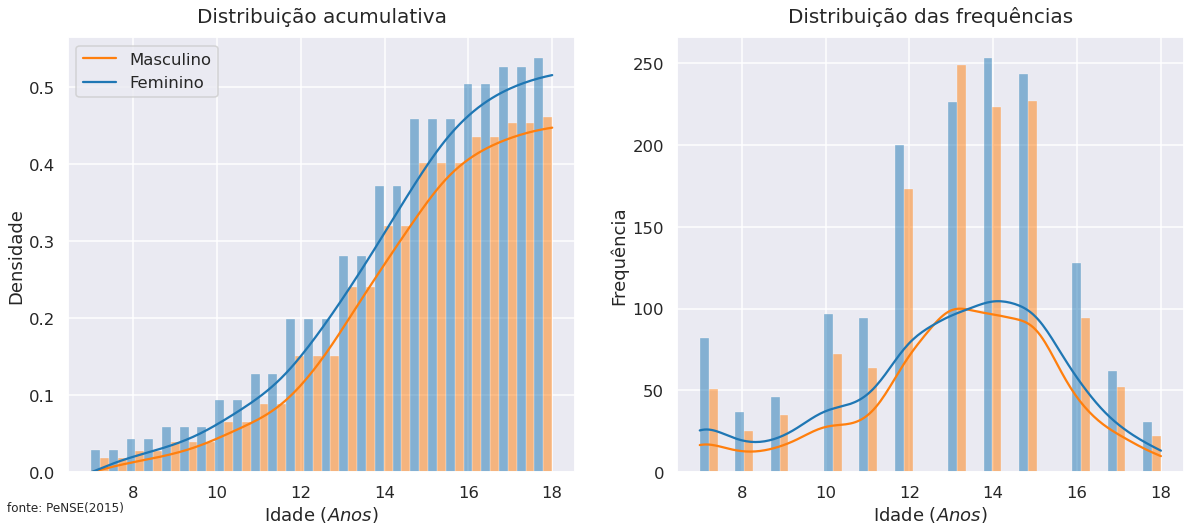

In [47]:
plt.subplot(1,2,1)
plt.text(5,-0.05,'fonte: PeNSE(2015)', fontsize=12)
ax = sns.histplot(data=consumiu_cigarro,x='idade_quando_experimentou_cigarro',
                  hue='sexo',kde=True, palette='tab10',
                  cumulative=True, stat='density',multiple="dodge", legend=True);
ax.set_title('Distribuição acumulativa',pad=15,fontsize=20)
ax.set_ylabel('Densidade', fontsize=18)
ax.set_xlabel(r'Idade $(Anos)$', fontsize=18)
ax.legend(sexo.values());

plt.subplot(1,2,2)
ax = sns.histplot(data=consumiu_cigarro,x='idade_quando_experimentou_cigarro',
                  hue='sexo',kde=True, palette='tab10', multiple="dodge", legend=False);
ax.set_title('Distribuição das frequências',pad=15,fontsize=20)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_xlabel(r'Idade $(Anos)$', fontsize=18)
ax.figure.set_size_inches(20,8)
plt.show()

#### Comentário sobre análise grafica
> Visualmente os dados não se assemelham a nenhuma distribuição conhecida. Podemos realizar um teste não paramétrico que possa ser aplicado em variáveis quantitativas ordinais para verificar se estas amostras (alunos que já consumiram cigarro) provém da mesma distribuição. 

O teste que será aplicado é o teste de Mann-Whitney, este teste serve para verificar se as duas amostras tem da mesma distribuição. Podemos aplicar teste teste para o caso de variáveis aleatórias qualitativas ordinais ou quantitativas segunddo [Portal Action: Teste de Wilcoxon-Mann-Whitney](http://www.portalaction.com.br/tecnicas-nao-parametricas/teste-de-wilcoxon-mann-whitney-amostras-independentes), é razoável considerar que as variáveis são independentes, pois a resposta do sexo masculino aparentemente não tem dependência com a resposta de uma amostra feminina.

As hipóteses consideradas para o teste Mann-Whitney são:

> $H_0: \text{ As duas amostras vêm da mesma distribuição  }$

> $H_1: \text{ As duas NÃO amostras vêm da mesma distribuição  }$

> Se o $p$-valor $< 0.05$, rejeita-se $H_0$

Para mais informações sobre o teste consulte a fonte:
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html?highlight=mannwhitneyu#scipy.stats.mannwhitneyu

In [10]:
from scipy.stats import mannwhitneyu

meninos_consumiram_cigarro = consumiu_cigarro.query('sexo == 1')['idade_quando_experimentou_cigarro'].sample(1200,random_state=2021)
meninas_consumiram_cigarro = consumiu_cigarro.query('sexo == 2')['idade_quando_experimentou_cigarro'].sample(1200,random_state=2021)

_, pvalor =  mannwhitneyu(meninos_consumiram_cigarro, meninas_consumiram_cigarro,
                                     use_continuity=False, alternative='two-sided')
print(f'pvalor: {pvalor}\n')

if pvalor <= 0.05:
    print('Rejeita-se hipótese nula')
elif pvalor > 0.05:
    print('Não é possivel rejeitar hipótese nula')

pvalor: 0.24733895299931408

Não é possivel rejeitar hipótese nula


#### Comentário sobre a aplicação do Teste de Mann-Whitney para amostras que já experimentaram cigarro

> Tendo em vista o teste de Mann-Whitney, podemos afirmar com um nível de confiança de $95\%$, que não existe evidência estatistica para afirmar que as duas amostras vêm de distribuições diferentes. Com isso aceitamos que os dados provém de uma mesma distribuição e portanto o fato do sexo ser masculino ou feminino não tem influência na experimentação de cigarro. Lembrando que esta conclusão pode ser feita a partir desses dados amostrais.

###

In [11]:
pd.crosstab(consumiu_cigarro['responsáveis_fuma'],consumiu_cigarro['sexo']).rename(index=responsaveis_fuma, columns=sexo)

sexo,Masculino,Feminino
responsáveis_fuma,,
Nenhum deles,977,770
Só meu pai ou responsável do sexo masculino,244,204
Só minha mãe ou responsável do sexo feminino,137,176
Meu pai e minha mãe ou responsáveis,92,103
Não sei,46,32
Não informado,3,2


## Segunda Análise: Presença de babidas alcoolicas na vida do adolescente
